In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [106]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [107]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [108]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [109]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [110]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [111]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=2, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries with Focus on Extremes", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


In [112]:
def visualize_bubble_chart(df, title, years=None):
    # Filter the data for the specific indicator
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate the average value across the specified years
    data['Average'] = data[years].mean(axis=1)

    # Create a bubble chart for each year
    plt.figure(figsize=(14, 8))
    for year in years:
        plt.scatter(data['Country'], [year] * len(data), s=data[year] /10,
            alpha=0.6,
            label=f"{year}"
        )

    # Chart customization
    plt.title(title, fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.6)
    plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

# EDA

In [113]:
fac = pd.read_csv('../data/preprecessed_data/asian_fac.csv')
fac

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,Armenia,ARM,Carbon stocks in forests,Million tonnes,1.540520e+01,1.539540e+01,1.538550e+01,NaN,NaN
1,Armenia,ARM,Forest area,1000 HA,3.288900e+02,3.286800e+02,3.284700e+02,3.282600e+02,3.280500e+02
2,Armenia,ARM,Share of forest area,Percent,1.155216e+01,1.154478e+01,1.153741e+01,1.153003e+01,1.152266e+01
3,Bangladesh,BGD,Carbon stocks in forests,Million tonnes,8.198440e+01,8.198440e+01,8.198440e+01,NaN,NaN
4,Bangladesh,BGD,Forest area,1000 HA,1.883400e+03,1.883400e+03,1.883400e+03,1.883400e+03,1.883400e+03
...,...,...,...,...,...,...,...,...,...
117,Viet Nam,VNM,Carbon stocks in forests,Million tonnes,5.422641e+02,5.429192e+02,5.461873e+02,NaN,NaN
118,Viet Nam,VNM,Forest area,1000 HA,1.449129e+04,1.456719e+04,1.464309e+04,1.471899e+04,1.479489e+04
119,Viet Nam,VNM,Share of forest area,Percent,4.623468e+01,4.647684e+01,4.671900e+01,4.696116e+01,4.720332e+01
120,World,WLD,Carbon stocks in forests,Million tonnes,2.944503e+05,2.942958e+05,2.941356e+05,NaN,NaN


In [114]:
fac['Indicator'].value_counts()

Indicator
Carbon stocks in forests    41
Forest area                 41
Share of forest area        40
Name: count, dtype: int64

## Carbon stocks in forests
Do dữ liệu thu thập từ IMF chưa cập nhật đến năm 2021 và 2022 nên ở chỉ số này nhóm chỉ phân tích dữ liệu trong khoảng 2018-2020

In [115]:
carbon = fac[fac['Indicator']=='Carbon stocks in forests']
carbon = carbon[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020']]

In [116]:
carbon[carbon['ISO3'] == 'WLD']

,Country,ISO3,Indicator,Unit,2018,2019,2020
120,World,WLD,Carbon stocks in forests,Million tonnes,294450.3036,294295.808,294135.6234


In [117]:
carbonww = carbon[carbon['ISO3'] != 'WLD']

In [118]:
carbonww.describe()

,2018,2019,2020
count,40.000000,40.000000,40.000000
mean,932.195017,934.424190,936.798080
std,2030.468919,2039.087831,2048.436443
min,0.064500,0.064500,0.064500
25%,15.935525,15.931550,15.931550
50%,174.248400,173.301500,172.342150
75%,749.902350,753.678500,757.422125
max,9735.807400,9672.649500,9609.492800


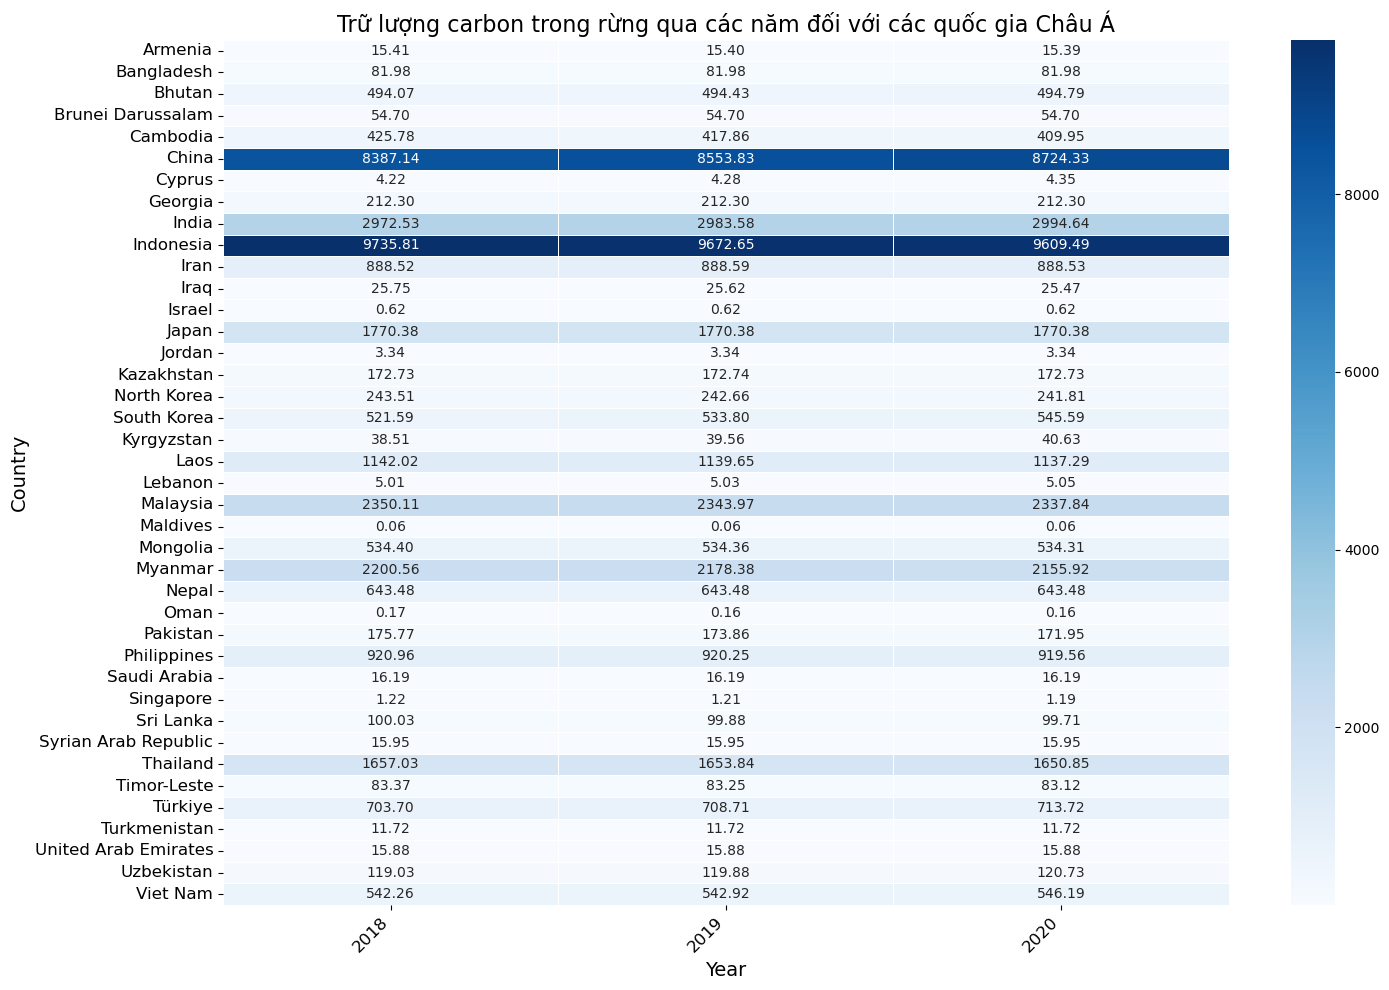

In [119]:
title = "Trữ lượng carbon trong rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(carbonww, title)

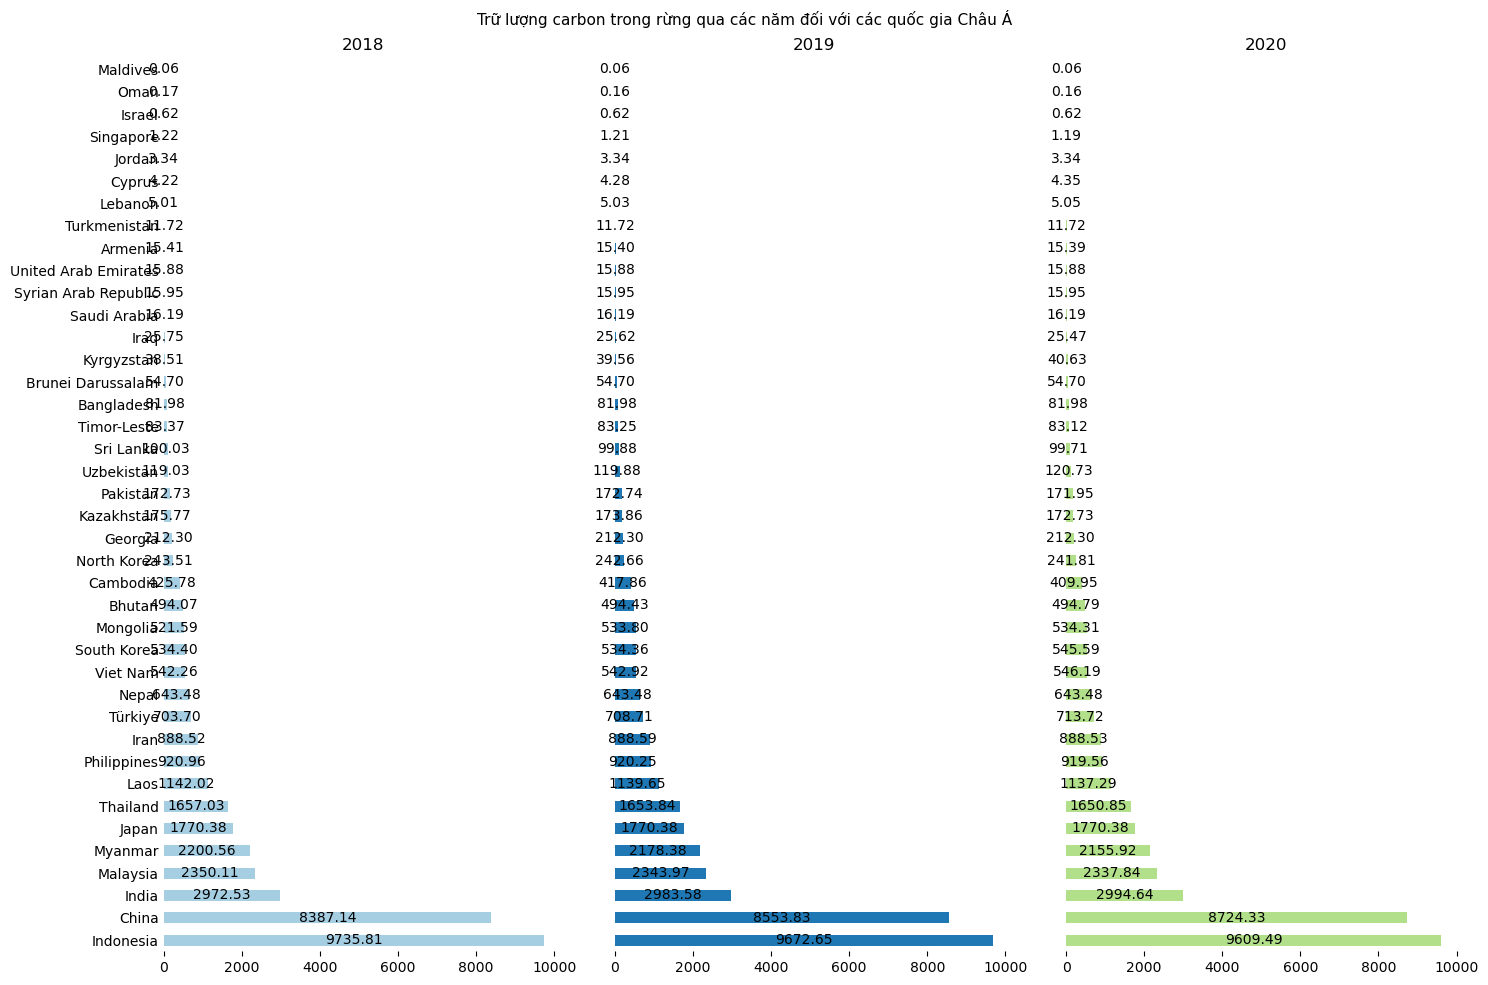

In [120]:
title = "Trữ lượng carbon trong rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(carbonww, title)

In [121]:
top_k_countries_by_year(carbonww, k=3)

Top 3 countries for 2018:
Country: Indonesia, Value: 9735.807
Country: China, Value: 8387.137
Country: India, Value: 2972.529
----------------------------------------
Top 3 countries for 2019:
Country: Indonesia, Value: 9672.649
Country: China, Value: 8553.827
Country: India, Value: 2983.584
----------------------------------------
Top 3 countries for 2020:
Country: Indonesia, Value: 9609.493
Country: China, Value: 8724.335
Country: India, Value: 2994.640
----------------------------------------


In [122]:
bottom_k_countries_by_year(carbonww, k=3)

Bottom 3 countries for 2018:
Country: Maldives, Value: 0.065
Country: Oman, Value: 0.167
Country: Israel, Value: 0.624
----------------------------------------
Bottom 3 countries for 2019:
Country: Maldives, Value: 0.065
Country: Oman, Value: 0.162
Country: Israel, Value: 0.624
----------------------------------------
Bottom 3 countries for 2020:
Country: Maldives, Value: 0.065
Country: Oman, Value: 0.162
Country: Israel, Value: 0.624
----------------------------------------


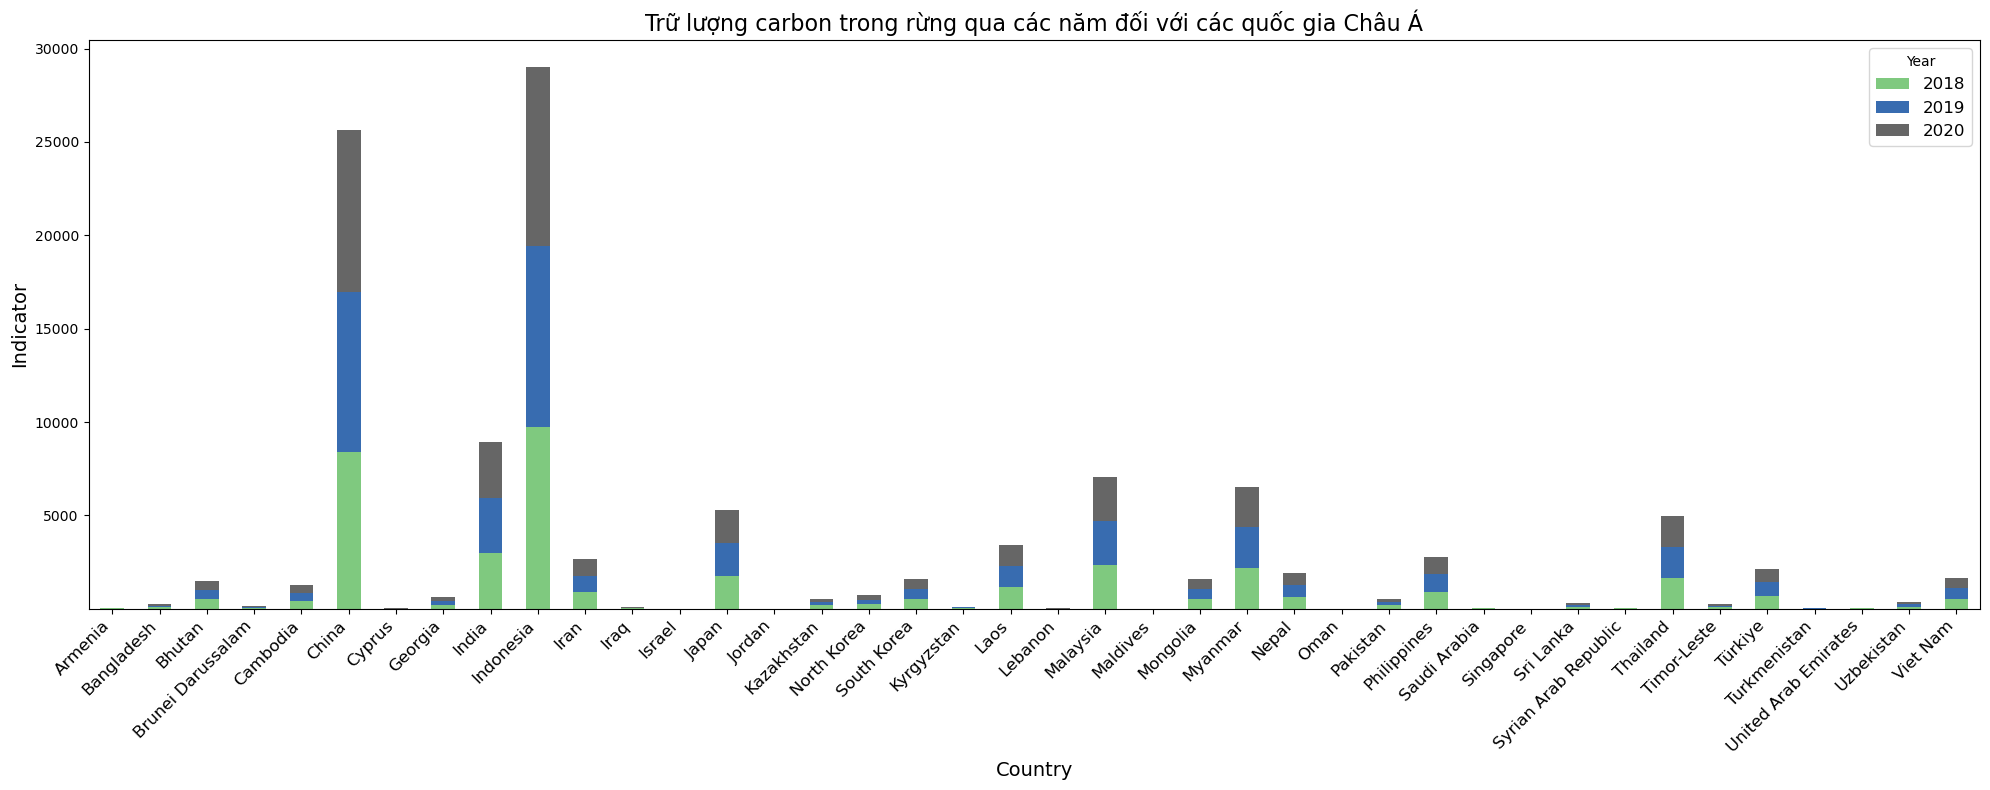

In [123]:
title = "Trữ lượng carbon trong rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(carbonww, title)

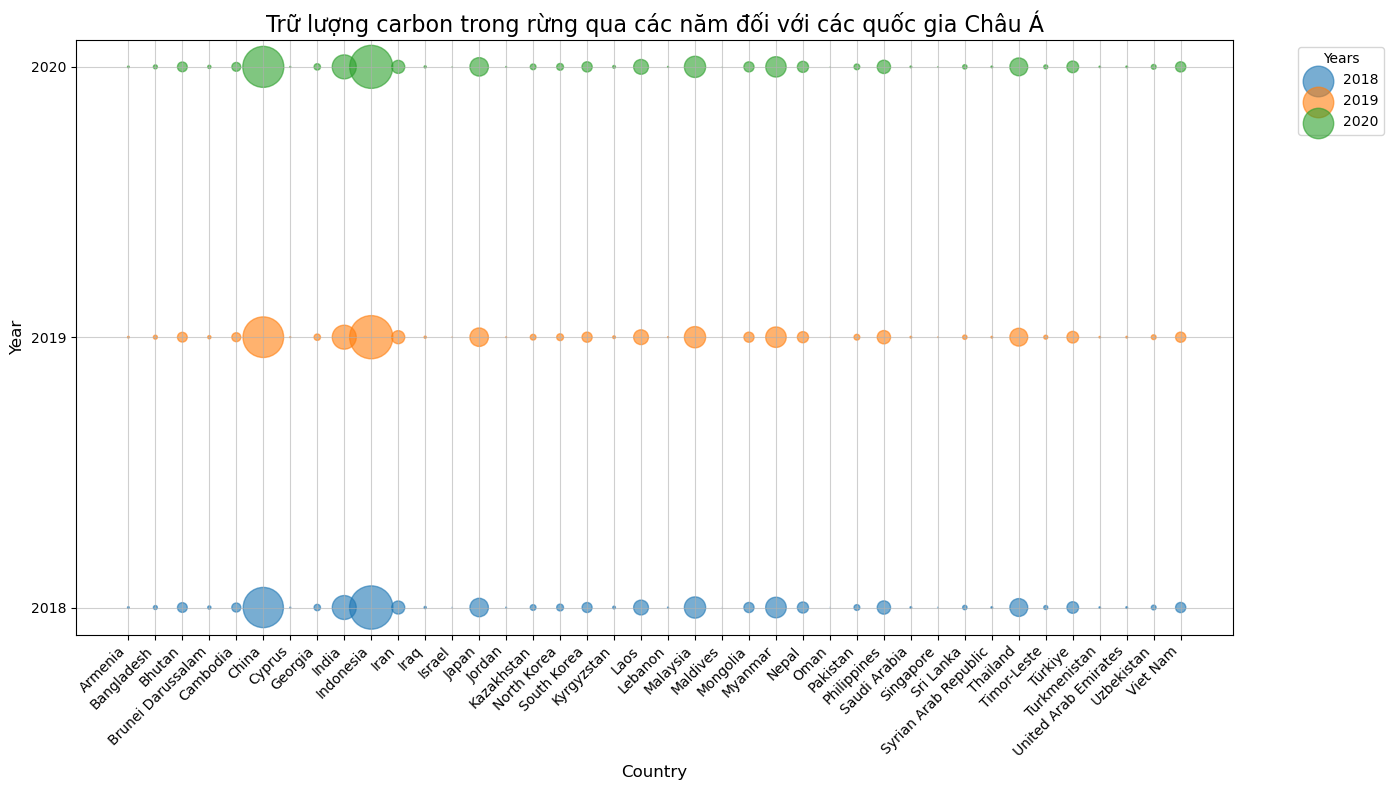

In [124]:
title = "Trữ lượng carbon trong rừng qua các năm đối với các quốc gia Châu Á"
visualize_bubble_chart(carbonww, title)

## Forest Area
Tổng diện tích rừng

In [125]:
forest_area = fac[fac['Indicator']=='Forest area']
forest_area

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
1,Armenia,ARM,Forest area,1000 HA,3.288900e+02,328.68,328.47,3.282600e+02,3.280500e+02
4,Bangladesh,BGD,Forest area,1000 HA,1.883400e+03,1883.40,1883.40,1.883400e+03,1.883400e+03
7,Bhutan,BTN,Forest area,1000 HA,2.721120e+03,2723.10,2725.08,2.727060e+03,2.729040e+03
10,Brunei Darussalam,BRN,Forest area,1000 HA,3.800000e+02,380.00,380.00,3.800000e+02,3.800000e+02
13,Cambodia,KHM,Forest area,1000 HA,8.379750e+03,8224.06,8068.37,7.912680e+03,7.756990e+03
16,China,CHN,Forest area,1000 HA,2.162190e+05,218098.61,219978.18,2.218578e+05,2.237373e+05
19,Cyprus,CYP,Forest area,1000 HA,1.725700e+02,172.55,172.53,1.725100e+02,1.724900e+02
22,Georgia,GEO,Forest area,1000 HA,2.822400e+03,2822.40,2822.40,2.822400e+03,2.822400e+03
25,India,IND,Forest area,1000 HA,7.162720e+04,71893.60,72160.00,7.242640e+04,7.269280e+04
28,Indonesia,IDN,Forest area,1000 HA,9.334427e+04,92738.73,92133.20,9.152766e+04,9.092213e+04


In [126]:
forest_area.describe()

,2018,2019,2020,2021,2022
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,1.142872e+05,1.141937e+05,1.141043e+05,1.140122e+05,1.139219e+05
std,6.341336e+05,6.333489e+05,6.325918e+05,6.318175e+05,6.310551e+05
min,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01
25%,5.220800e+02,5.220800e+02,5.220800e+02,5.220800e+02,5.220800e+02
50%,3.637980e+03,3.663820e+03,3.689660e+03,3.684560e+03,3.643220e+03
75%,1.449129e+04,1.456719e+04,1.464309e+04,1.471899e+04,1.479489e+04
max,4.068920e+06,4.063831e+06,4.058918e+06,4.053893e+06,4.048942e+06


In [127]:
forest_area[forest_area['ISO3'] == 'WLD']

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
121,World,WLD,Forest area,1000 HA,4.068920e+06,4063830.76,4058917.72,4.053893e+06,4.048942e+06


In [128]:
forest_area_ = forest_area[forest_area['ISO3'] != 'WLD']

In [129]:
forest_area_.describe()

,2018,2019,2020,2021,2022
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,15421.378030,15452.747000,15483.917750,15515.220645,15546.435445
std,37525.978333,37760.595829,37996.543029,38233.753824,38472.232443
min,0.820000,0.820000,0.820000,0.820000,0.820000
25%,486.560000,486.560000,486.560000,486.560000,486.560000
50%,3517.090600,3544.630000,3572.170000,3584.239600,3578.189450
75%,14254.072500,14272.215000,14290.357500,14308.500000,14326.642500
max,216219.040000,218098.610000,219978.180000,221857.750000,223737.320000


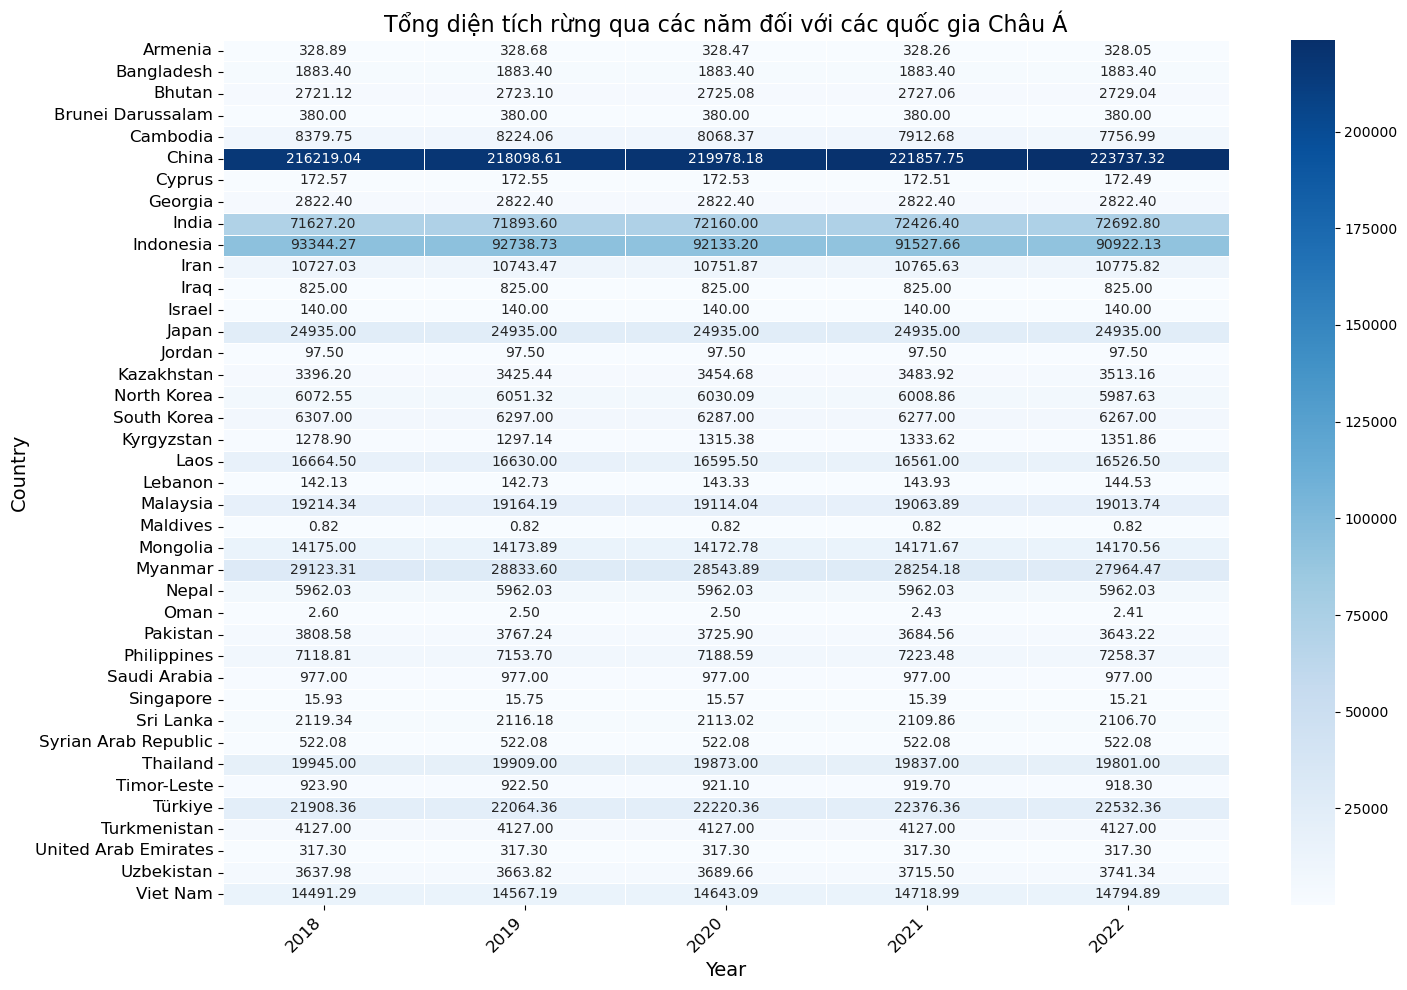

In [130]:
title = "Tổng diện tích rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(forest_area_, title)

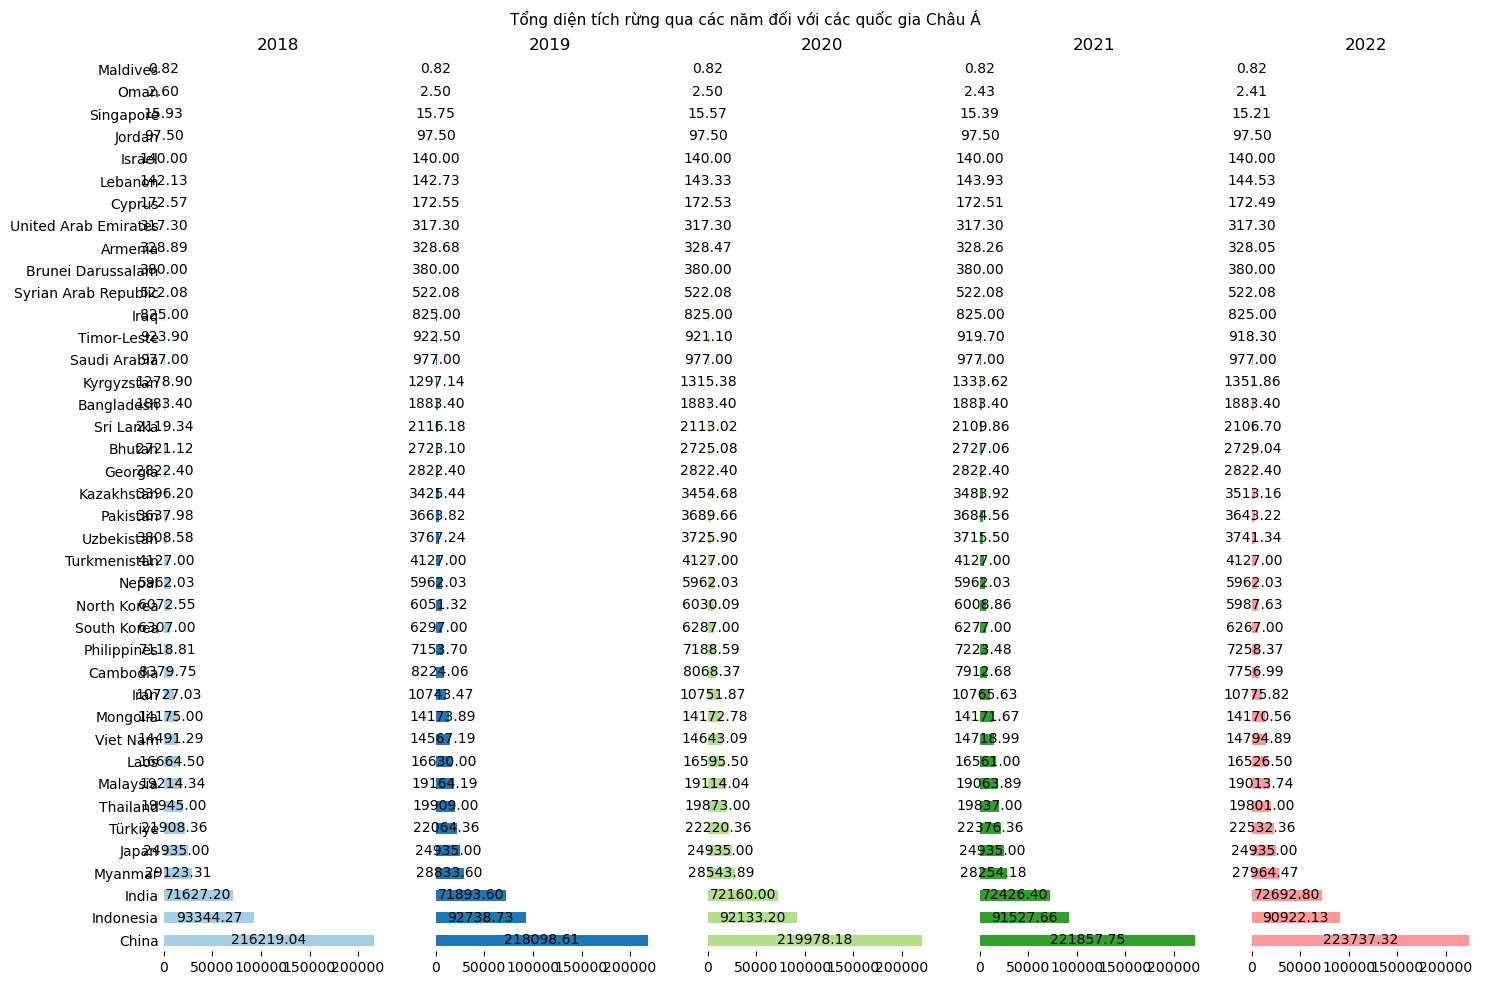

In [131]:
title = "Tổng diện tích rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(forest_area_, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [132]:
top_k_countries_by_year(forest_area_, k=3)

Top 3 countries for 2018:
Country: China, Value: 216219.040
Country: Indonesia, Value: 93344.270
Country: India, Value: 71627.200
----------------------------------------
Top 3 countries for 2019:
Country: China, Value: 218098.610
Country: Indonesia, Value: 92738.730
Country: India, Value: 71893.600
----------------------------------------
Top 3 countries for 2020:
Country: China, Value: 219978.180
Country: Indonesia, Value: 92133.200
Country: India, Value: 72160.000
----------------------------------------
Top 3 countries for 2021:
Country: China, Value: 221857.750
Country: Indonesia, Value: 91527.663
Country: India, Value: 72426.400
----------------------------------------
Top 3 countries for 2022:
Country: China, Value: 223737.320
Country: Indonesia, Value: 90922.131
Country: India, Value: 72692.800
----------------------------------------


In [133]:
bottom_k_countries_by_year(forest_area_, k=3)

Bottom 3 countries for 2018:
Country: Maldives, Value: 0.820
Country: Oman, Value: 2.600
Country: Singapore, Value: 15.930
----------------------------------------
Bottom 3 countries for 2019:
Country: Maldives, Value: 0.820
Country: Oman, Value: 2.500
Country: Singapore, Value: 15.750
----------------------------------------
Bottom 3 countries for 2020:
Country: Maldives, Value: 0.820
Country: Oman, Value: 2.500
Country: Singapore, Value: 15.570
----------------------------------------
Bottom 3 countries for 2021:
Country: Maldives, Value: 0.820
Country: Oman, Value: 2.433
Country: Singapore, Value: 15.390
----------------------------------------
Bottom 3 countries for 2022:
Country: Maldives, Value: 0.820
Country: Oman, Value: 2.411
Country: Singapore, Value: 15.210
----------------------------------------


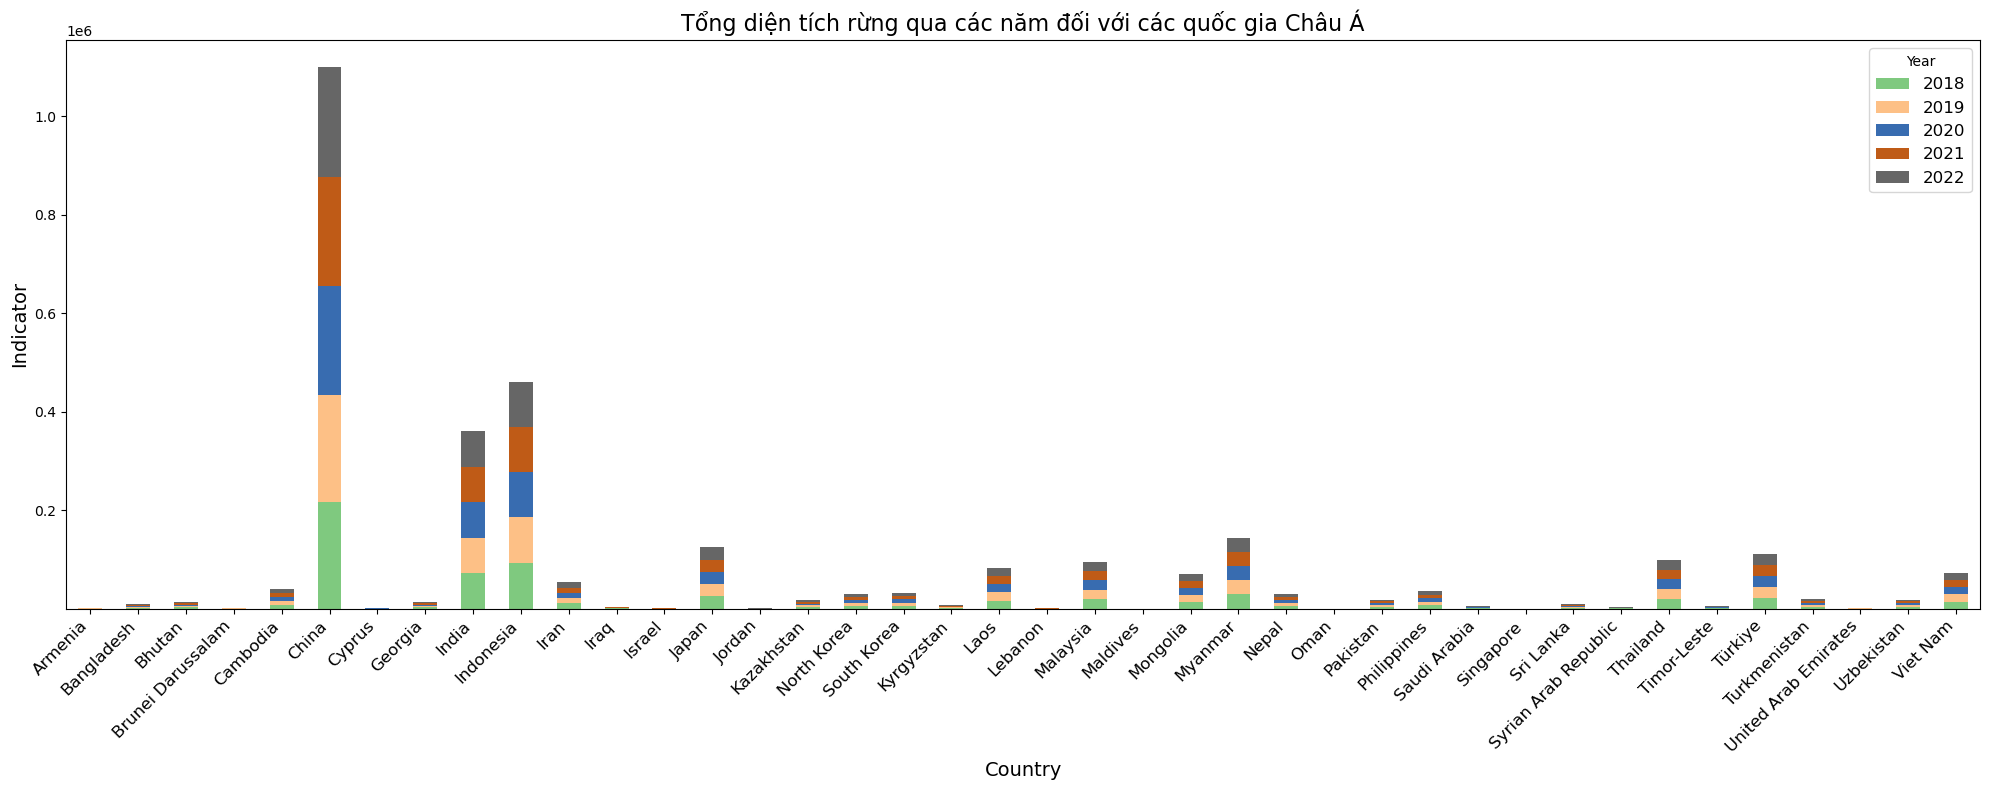

In [134]:
title = "Tổng diện tích rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(forest_area_, title)

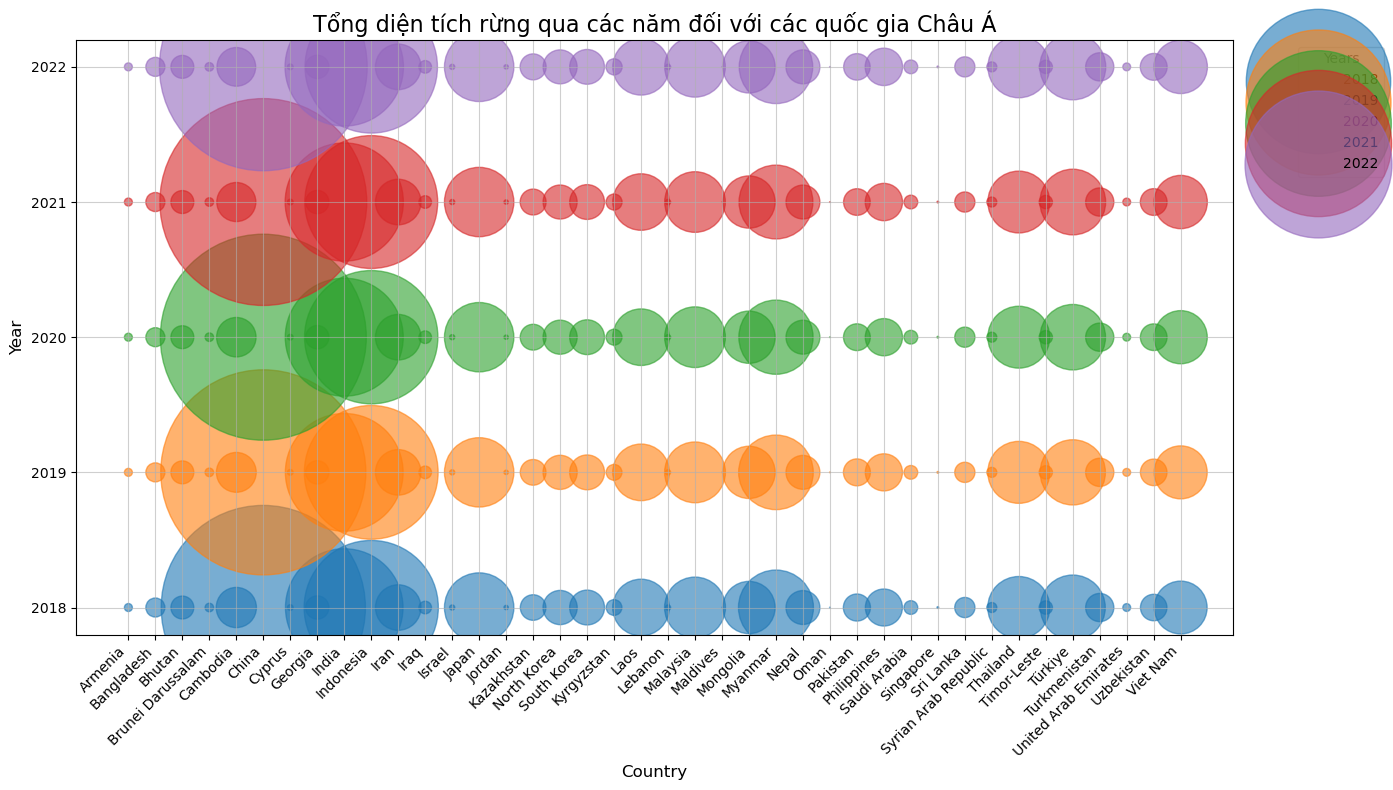

In [135]:
title = "Tổng diện tích rừng qua các năm đối với các quốc gia Châu Á"
visualize_bubble_chart(forest_area_, title)

## Share of forest area
Tỉ lệ diện tích rừng trên tổng diện tích đất

In [136]:
share_forest_area = fac[fac['Indicator']=='Share of forest area']
share_forest_area

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
2,Armenia,ARM,Share of forest area,Percent,11.552160,11.544784,11.537408,11.530032,11.522655
5,Bangladesh,BGD,Share of forest area,Percent,14.468772,14.468772,14.468772,14.468772,14.468772
8,Bhutan,BTN,Share of forest area,Percent,71.345569,71.397483,71.449397,71.501311,71.553225
11,Brunei Darussalam,BRN,Share of forest area,Percent,72.106262,72.106262,72.106262,72.106262,72.106262
14,Cambodia,KHM,Share of forest area,Percent,47.471958,46.589961,45.707965,44.825969,43.943972
17,China,CHN,Share of forest area,Percent,23.030912,23.231118,23.431323,23.631528,23.831734
20,Cyprus,CYP,Share of forest area,Percent,18.676407,18.674242,18.672078,18.669913,18.667749
23,Georgia,GEO,Share of forest area,Percent,40.615916,40.615916,40.615916,40.615916,40.615916
26,India,IND,Share of forest area,Percent,24.091027,24.180628,24.270228,24.359829,24.449430
29,Indonesia,IDN,Share of forest area,Percent,49.716818,49.394296,49.071780,48.361945,48.041990


In [137]:
share_forest_area.describe()

,2018,2019,2020,2021,2022
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.732282,27.688812,27.646622,27.596325,27.555131
std,24.102021,24.045615,23.992874,23.932221,23.882443
min,0.008401,0.008078,0.008078,0.007862,0.007790
25%,6.575941,6.583540,6.587423,6.593784,6.598492
50%,22.670918,22.614162,22.558280,22.533034,22.507789
75%,46.544001,46.505122,45.960724,45.359767,44.758810
max,72.203206,72.106262,72.106262,72.106262,72.106262


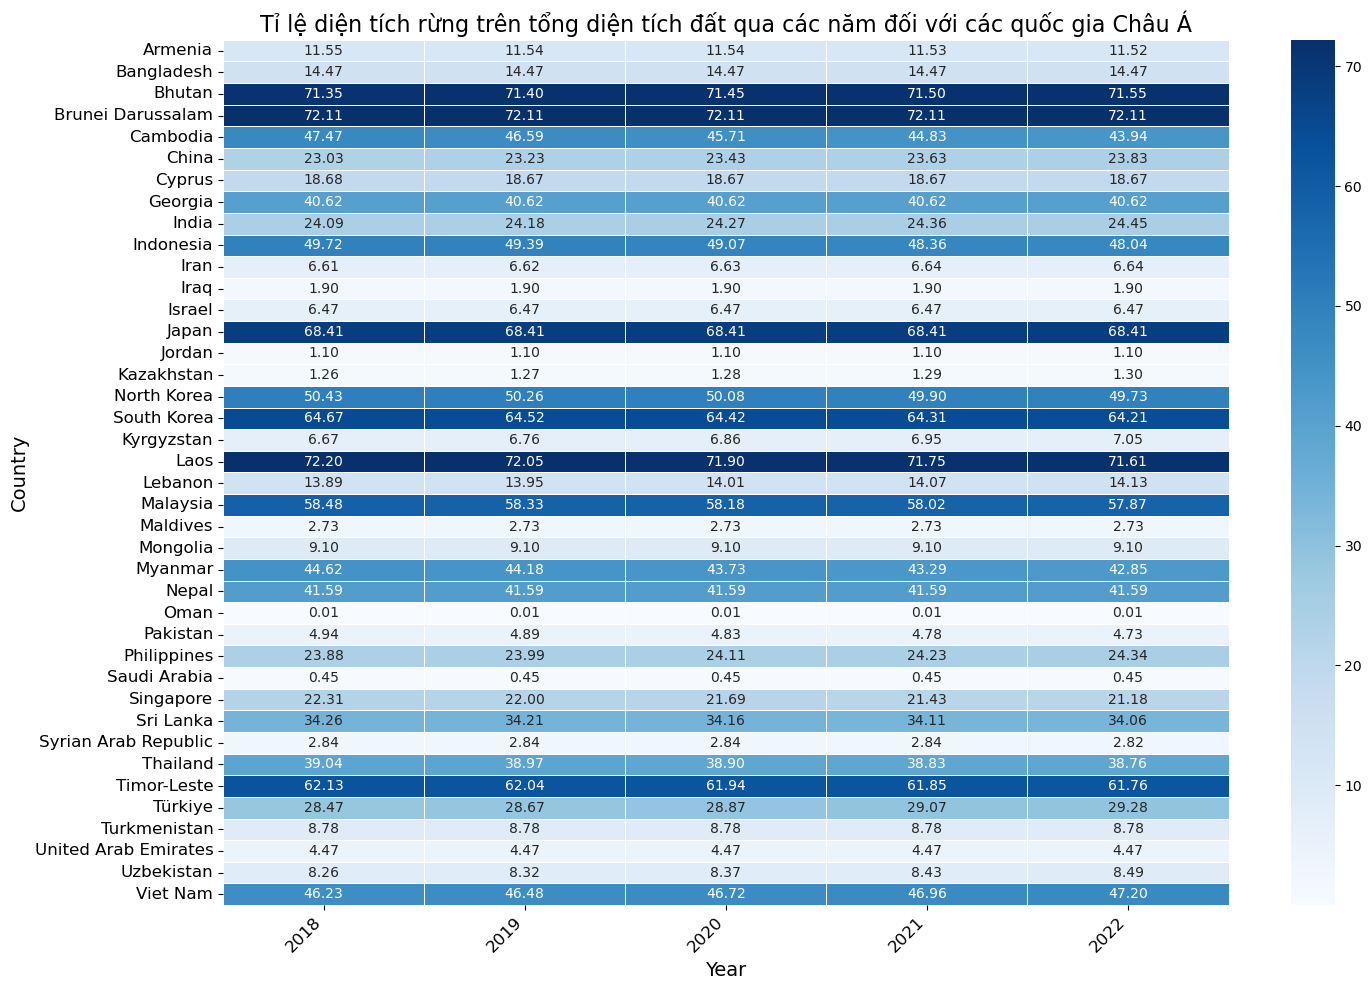

In [138]:
title = "Tỉ lệ diện tích rừng trên tổng diện tích đất qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(share_forest_area, title)

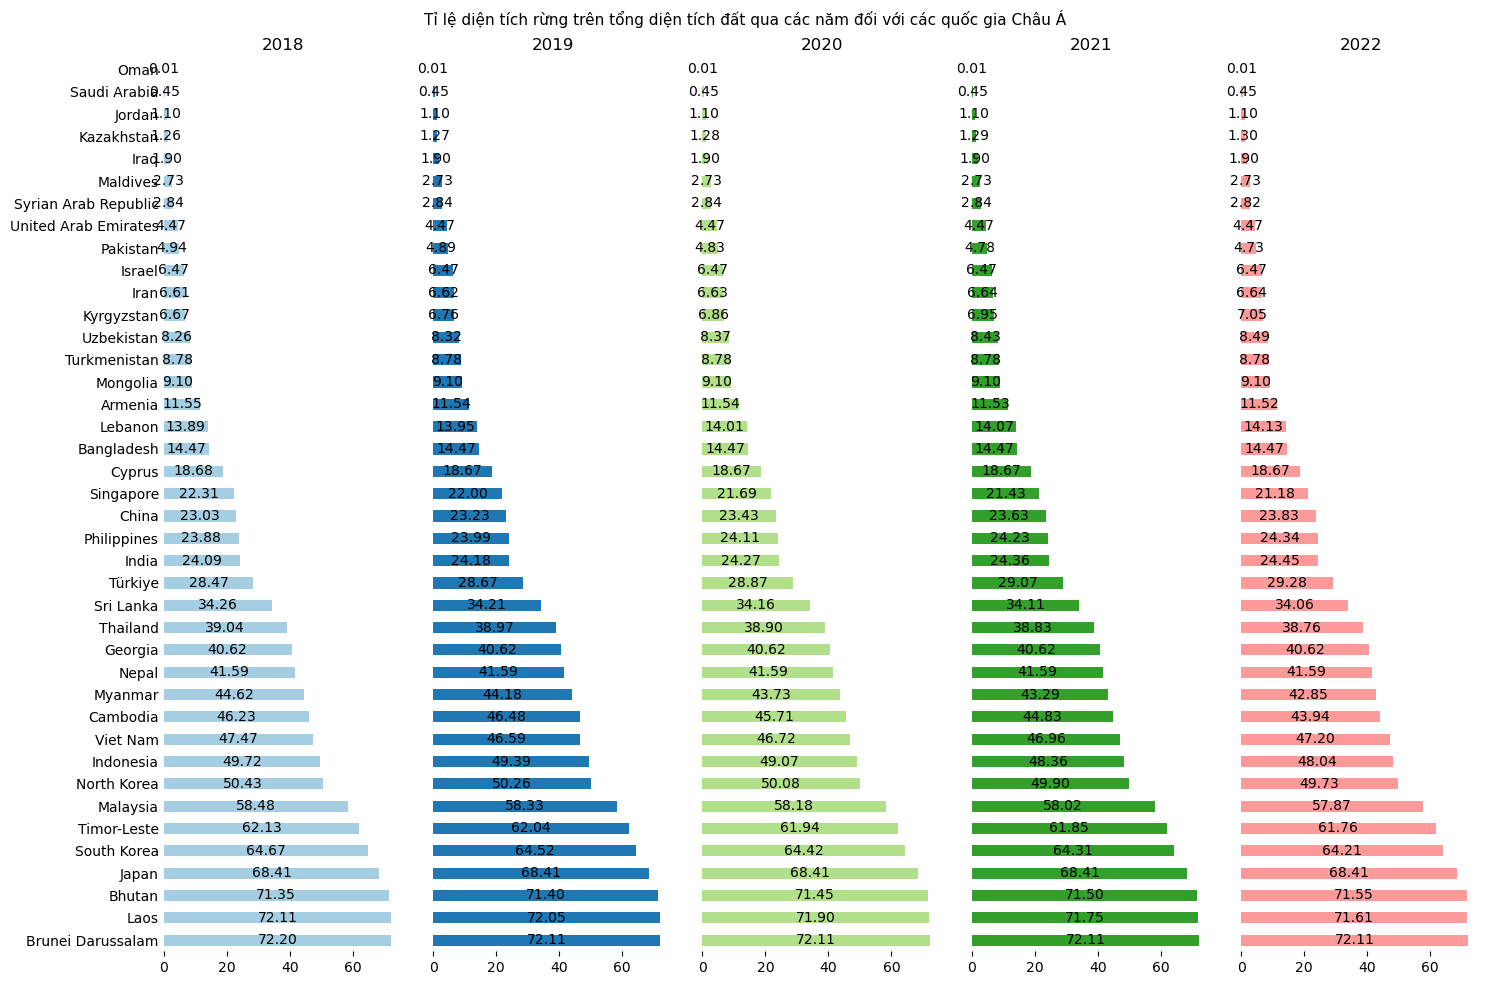

In [139]:
title = "Tỉ lệ diện tích rừng trên tổng diện tích đất qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(share_forest_area, title)

In [140]:
top_k_countries_by_year(share_forest_area, k=3)

Top 3 countries for 2018:
Country: Laos, Value: 72.203
Country: Brunei Darussalam, Value: 72.106
Country: Bhutan, Value: 71.346
----------------------------------------
Top 3 countries for 2019:
Country: Brunei Darussalam, Value: 72.106
Country: Laos, Value: 72.054
Country: Bhutan, Value: 71.397
----------------------------------------
Top 3 countries for 2020:
Country: Brunei Darussalam, Value: 72.106
Country: Laos, Value: 71.904
Country: Bhutan, Value: 71.449
----------------------------------------
Top 3 countries for 2021:
Country: Brunei Darussalam, Value: 72.106
Country: Laos, Value: 71.755
Country: Bhutan, Value: 71.501
----------------------------------------
Top 3 countries for 2022:
Country: Brunei Darussalam, Value: 72.106
Country: Laos, Value: 71.605
Country: Bhutan, Value: 71.553
----------------------------------------


In [141]:
bottom_k_countries_by_year(share_forest_area, k=3)

Bottom 3 countries for 2018:
Country: Oman, Value: 0.008
Country: Saudi Arabia, Value: 0.454
Country: Jordan, Value: 1.098
----------------------------------------
Bottom 3 countries for 2019:
Country: Oman, Value: 0.008
Country: Saudi Arabia, Value: 0.454
Country: Jordan, Value: 1.098
----------------------------------------
Bottom 3 countries for 2020:
Country: Oman, Value: 0.008
Country: Saudi Arabia, Value: 0.454
Country: Jordan, Value: 1.098
----------------------------------------
Bottom 3 countries for 2021:
Country: Oman, Value: 0.008
Country: Saudi Arabia, Value: 0.454
Country: Jordan, Value: 1.098
----------------------------------------
Bottom 3 countries for 2022:
Country: Oman, Value: 0.008
Country: Saudi Arabia, Value: 0.454
Country: Jordan, Value: 1.098
----------------------------------------


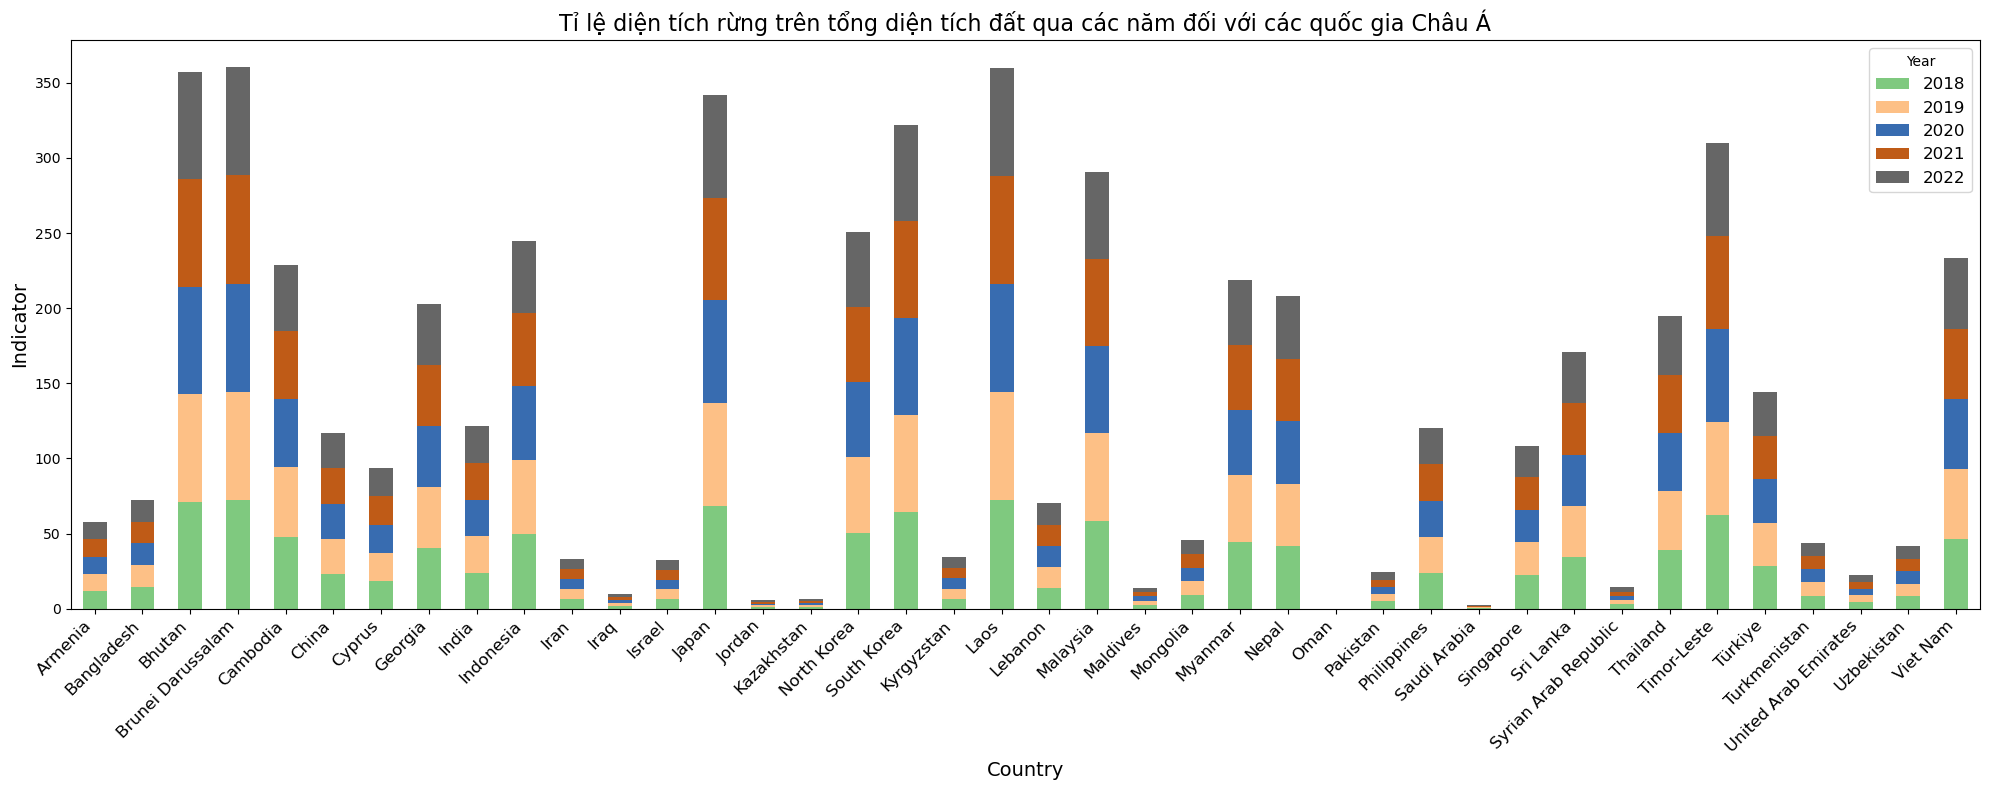

In [142]:
title = "Tỉ lệ diện tích rừng trên tổng diện tích đất qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(share_forest_area, title)

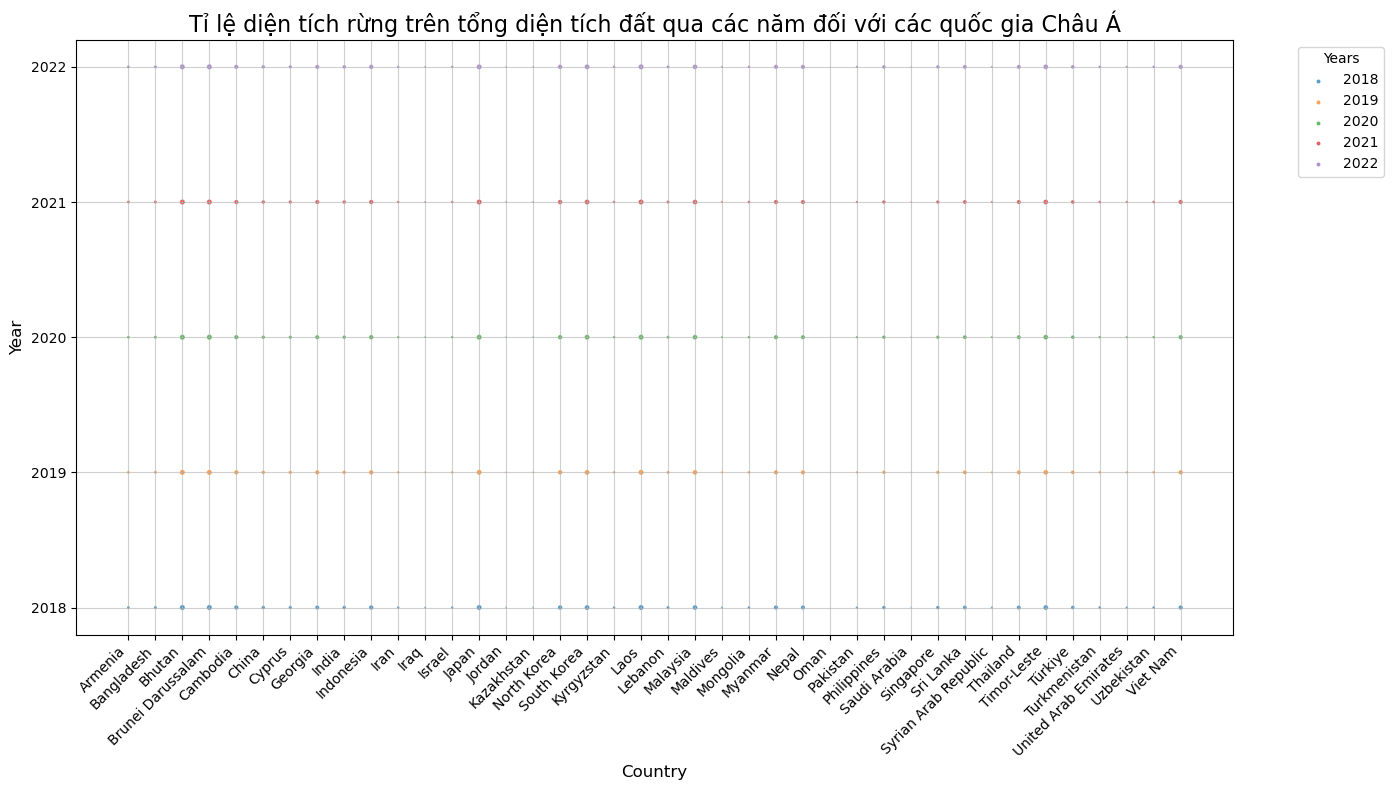

In [143]:
title = "Tỉ lệ diện tích rừng trên tổng diện tích đất qua các năm đối với các quốc gia Châu Á"
visualize_bubble_chart(share_forest_area, title)